In [109]:
# import statistics libraries 
import numpy as np
import pandas as pd
from scipy import stats
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
titanic = pd.read_csv("Data/train.csv")

In [111]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
def height_notation(plot_name , coordinator , dataframe , percent = False):
    total = len(dataframe)
    for p in plot_name.patches:
        height = p.get_height().round(2)
        text = str(int(height))
        if percent == True:
            plot_name.text(p.get_x() + p.get_width() / 2 , height + coordinator , text + ' | ' + str(height * 100 // total) + '%' , ha = 'center')
        else:
            plot_name.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = 'center')

In [114]:
# Survived
survived_dict = {0: "Dead", 1: "Alive"}
titanic["Survived"] = titanic["Survived"].map(survived_dict)
# Sex
sex_dict = {'male':'Male' , 'female':'Female'}
titanic['Sex'] = titanic['Sex'].map(sex_dict)
# Pclass
class_dict = {1: "First Class", 2: "Second Class", 3: "Third Class"}
titanic["Pclass"] = titanic["Pclass"].map(class_dict)
# Embarked
embarked_dict = {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
titanic["Embarked"] = titanic["Embarked"].map(embarked_dict)

In [115]:
survived_sex = pd.crosstab(titanic["Survived"], titanic["Sex"]).reset_index()

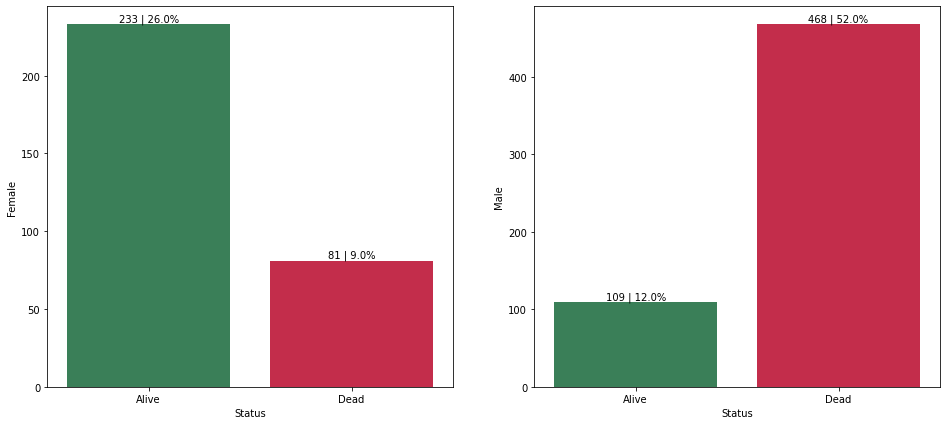

In [116]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
# Female Survived
survived_female = sns.barplot(x = survived_sex["Survived"], y = "Female", data= survived_sex,
                       palette = ['seagreen', 'crimson'], ax = axis[0])
height_notation(survived_female , 2 , titanic, True)
survived_female.set_xlabel("Status")
survived_female.set_ylabel("Female")
# Male Survived
survived_male = sns.barplot(x = survived_sex["Survived"], y = "Male", data= survived_sex,
                       palette = ['seagreen', 'crimson'], ax = axis[1])
height_notation(survived_male, 4, titanic, True)
survived_male.set_xlabel("Status")
survived_male.set_ylabel("Male")
plt.show()

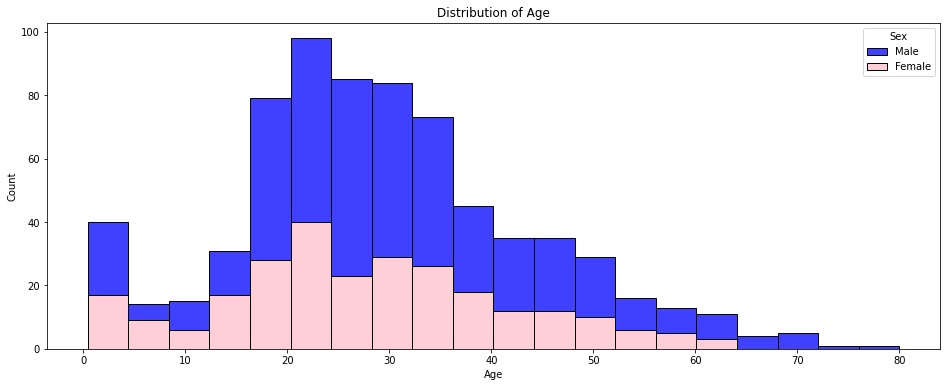

In [117]:
plt.figure(figsize = (16, 6))
sns.histplot(x= "Age", data = titanic, hue = "Sex", palette= ["blue", "pink"], multiple = "stack")
plt.title("Distribution of Age")
plt.show()

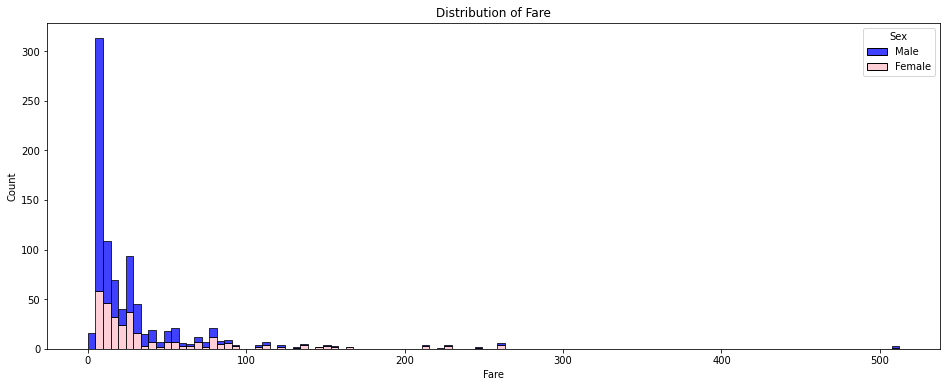

In [118]:
plt.figure(figsize = (16, 6))
sns.histplot(x= "Fare", data = titanic, hue = "Sex", palette= ["blue", "pink"], multiple= "stack")
plt.title("Distribution of Fare")
plt.show()

In [119]:
mask_of_anomaly_fare = np.where(stats.zscore(titanic["Fare"]) > 3, "Anomaly", "Normal")

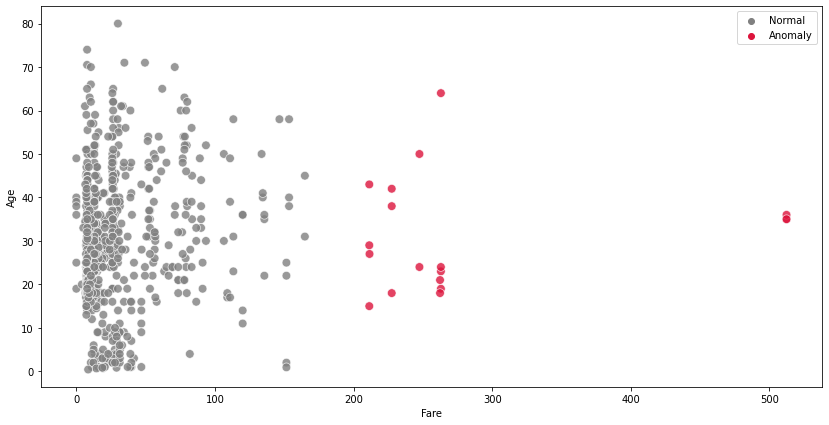

In [120]:
plt.figure(figsize = (14, 7))
sns.scatterplot(x = "Fare", y = "Age", data = titanic, hue = mask_of_anomaly_fare,
                palette = ["gray", "crimson"], s = 75, alpha = .8)
plt.show() 

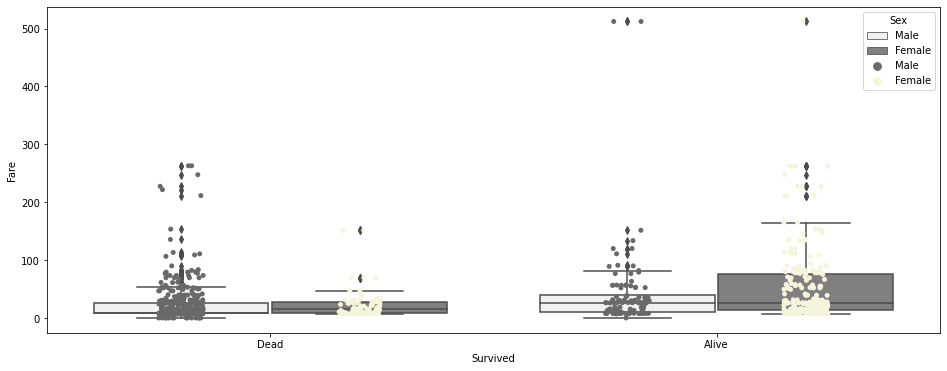

In [121]:
plt.figure(figsize = (16, 6))
sns.boxplot(x= "Survived", y= "Fare", data = titanic, color=".5", hue= "Sex")
sns.stripplot(x= "Survived", y= "Fare", data = titanic, palette = ["dimgray", "beige"], hue= "Sex", dodge= True)
plt.show()

In [122]:
sex_summary_stats = titanic.groupby(["Survived","Sex"]).agg({"Age": [np.min, np.median, np.mean, np.max],
                                                             "Fare": np.mean})
sex_summary_stats.columns = ["Age Min", "Age Median", "Age Mean", "Age Max", "Fare Mean"]
sex_summary_stats = sex_summary_stats.reset_index()

In [123]:
sex_summary_stats

,Survived,Sex,Age Min,Age Median,Age Mean,Age Max,Fare Mean
0,Alive,Female,0.75,28.0,28.847716,63.0,51.938573
1,Alive,Male,0.42,28.0,27.276022,80.0,40.821484
2,Dead,Female,2.00,24.5,25.046875,57.0,23.024385
3,Dead,Male,1.00,29.0,31.618056,74.0,21.960993


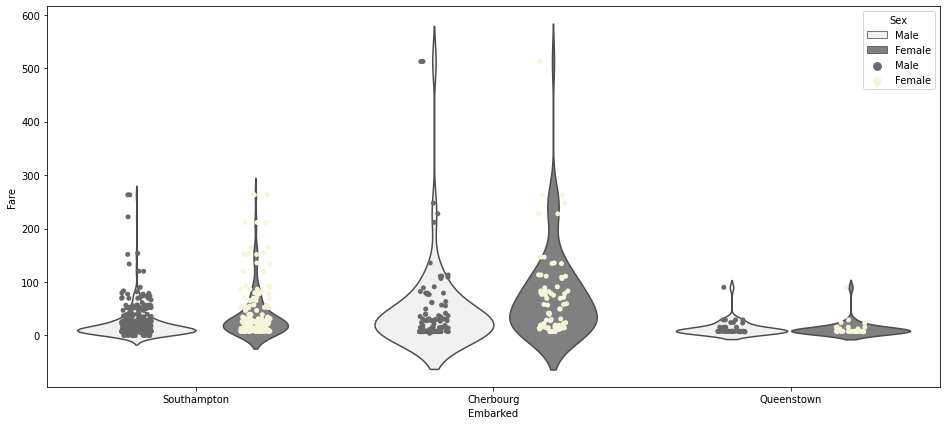

In [124]:
plt.figure(figsize = (16, 7))
embarked = sns.violinplot(x = "Embarked", y = "Fare", hue= "Sex", data = titanic, color=".5", inner = None)
embarked = sns.stripplot(x = "Embarked", y = "Fare", data = titanic, hue = "Sex", palette = ["dimgray", "beige"], color=".25", dodge = True)
plt.show()

In [125]:
sibling_spouse = pd.crosstab(titanic["SibSp"], titanic["Survived"]).reset_index()

In [126]:
sibsp_palette = list(map(lambda x : 'crimson' if x == 1 else 'gray', [each for each in titanic['SibSp'].sort_values().unique()]))

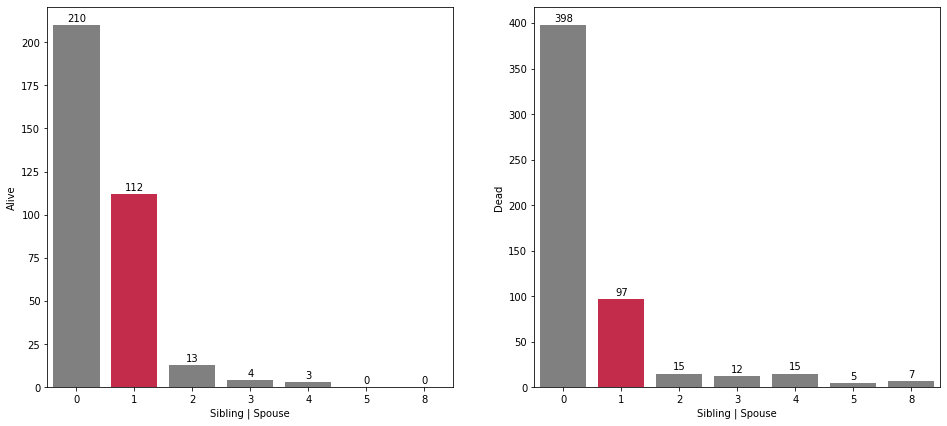

In [127]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
alive = sns.barplot(x = "SibSp", y = "Alive", data = sibling_spouse, palette= sibsp_palette, ax = axis[0])
alive.set_xlabel("Sibling | Spouse")
height_notation(alive, 2, titanic)
dead = sns.barplot(x = "SibSp", y = "Dead", data = sibling_spouse, palette= sibsp_palette, ax = axis[1])
dead.set_xlabel("Sibling | Spouse")
height_notation(dead, 4, titanic)

In [128]:
children_parent = pd.crosstab(titanic["Parch"], titanic["Survived"]).reset_index()

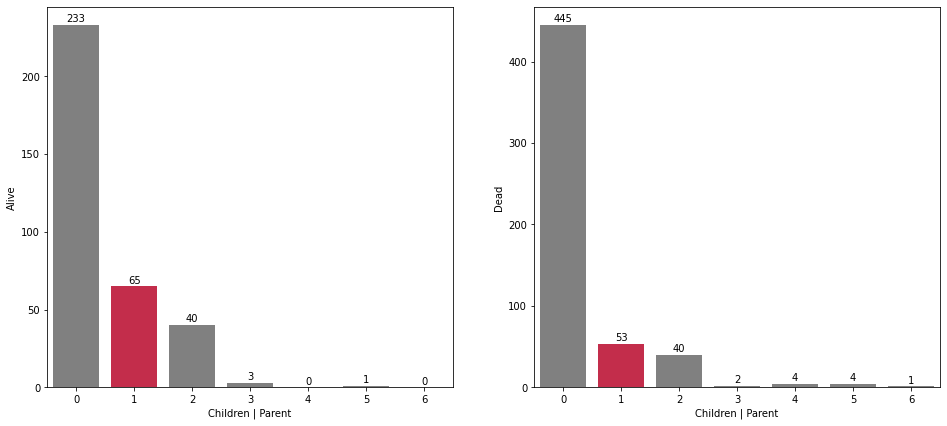

In [129]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
alive = sns.barplot(x = "Parch", y = "Alive", data = children_parent, palette= sibsp_palette, ax = axis[0])
alive.set_xlabel("Children | Parent")
height_notation(alive, 2, titanic)
dead = sns.barplot(x = "Parch", y = "Dead", data = children_parent, palette= sibsp_palette, ax = axis[1])
dead.set_xlabel("Children | Parent")
height_notation(dead, 4, titanic)

In [130]:
titanic["Number of Family"] = titanic["Parch"] + titanic["SibSp"]
family = pd.crosstab(titanic["Number of Family"], titanic["Survived"]).reset_index()

In [131]:
family_palette = list(map( lambda x : 'crimson' if x == 1 or x == 2 or x == 3 else 'gray',
                          [each for each in titanic['Number of Family'].sort_values().unique()]))

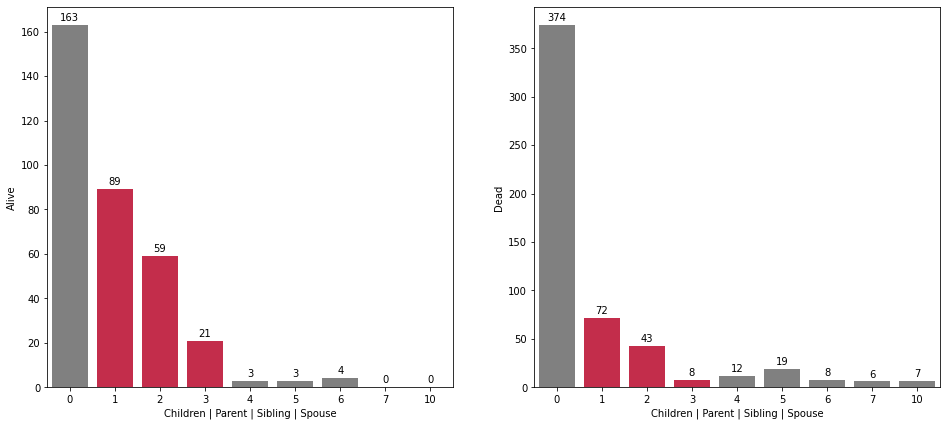

In [132]:
fig, axis = plt.subplots(1, 2, figsize = (16, 7))
alive = sns.barplot(x = "Number of Family", y = "Alive", data = family, palette= family_palette, ax = axis[0])
alive.set_xlabel("Children | Parent | Sibling | Spouse")
height_notation(alive, 2, titanic)
dead = sns.barplot(x = "Number of Family", y = "Dead", data = family, palette= family_palette, ax = axis[1])
dead.set_xlabel("Children | Parent | Sibling | Spouse")
height_notation(dead, 4, titanic)

In [133]:
label = ["youth", "young adulthood", "middle adulthood", "older adulthood", "average retirement", "retirement"]
values = [0, 1, 15, 25, 44, 64, 100]
titanic["Age Category"] = pd.cut(titanic["Age"],values, labels= label)

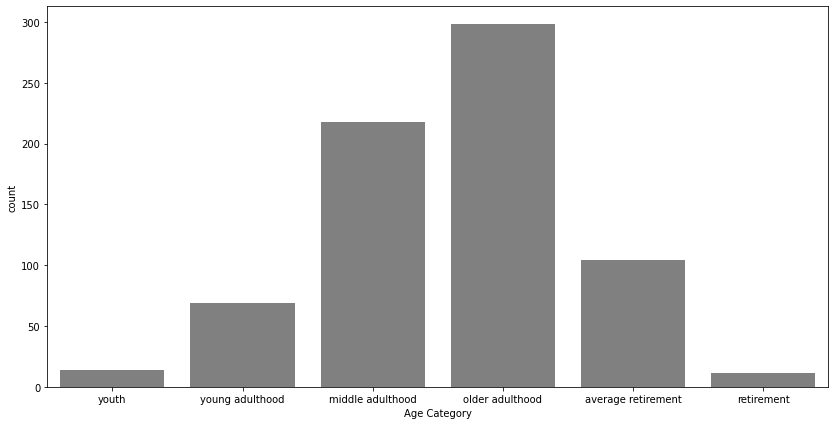

In [134]:
plt.figure(figsize = (14, 7))
sns.countplot(x = "Age Category", data = titanic, color = "grey")
plt.show()

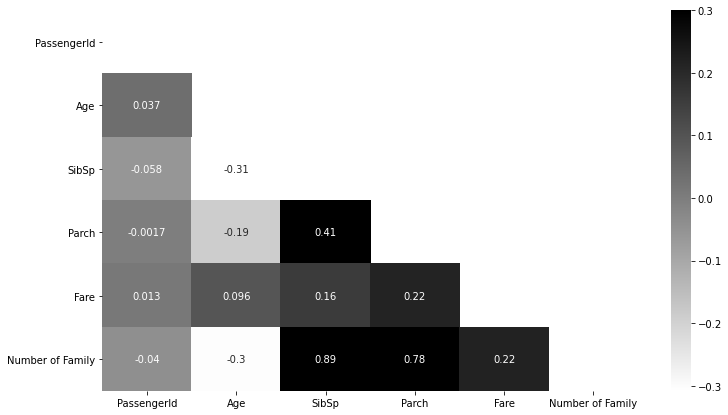

In [135]:
plt.figure(figsize = (12, 7))
corr = titanic.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
heat_corr = sns.heatmap(corr, mask = mask, vmax=.3, square = False, annot= True, cmap = "gray_r")
plt.setp(heat_corr.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")
plt.show()

In [136]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Number of Family,Age Category
0,1,Dead,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,1,middle adulthood
1,2,Alive,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,1,older adulthood
2,3,Alive,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,0,older adulthood
3,4,Alive,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,1,older adulthood
4,5,Dead,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,0,older adulthood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Dead,Second Class,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.0000,NaN,Southampton,0,older adulthood
887,888,Alive,First Class,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.0000,B42,Southampton,0,middle adulthood
888,889,Dead,Third Class,"Johnston, Miss. Catherine Helen ""Carrie""",Female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,3,NaN
889,890,Alive,First Class,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.0000,C148,Cherbourg,0,older adulthood


In [137]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

In [138]:
x = titanic[["Survived", "Sex", "Pclass", "Embarked"]]

In [139]:
x

,Survived,Sex,Pclass,Embarked
0,Dead,Male,Third Class,Southampton
1,Alive,Female,First Class,Cherbourg
2,Alive,Female,Third Class,Southampton
3,Alive,Female,First Class,Southampton
4,Dead,Male,Third Class,Southampton
...,...,...,...,...
886,Dead,Male,Second Class,Southampton
887,Alive,Female,First Class,Southampton
888,Dead,Female,Third Class,Southampton
889,Alive,Male,First Class,Cherbourg


In [150]:
categorical = Pipeline([('imputer', SimpleImputer(strategy=  , fill_value='missing')),
                        ('one_hot_encoder', OneHotEncoder(sparse = False, drop = "first"))])

/home/soroush/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass missing_values=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [151]:
categorical.fit(x)

ValueError: could not convert string to float: 'Dead'

In [146]:
categorical.transform(x)

array([[1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 0., 0.]])

In [149]:
categorical.named_steps["one_hot_encoder"].get_feature_names(["Survived", "Sex", "Pclass", "Embarked"])

array(['Survived_Dead', 'Sex_Male', 'Pclass_Second Class',
       'Pclass_Third Class', 'Embarked_Queenstown',
       'Embarked_Southampton', 'Embarked_missing'], dtype=object)

In [ ]:
x_1.shape

In [ ]:
one = OneHotEncoder()

In [ ]:
one.fit_transform(titanic["Embarked"].values.reshape(-1, 1))

In [ ]:
imputer = IterativeImputer()

In [ ]:
imputer.fit_transform(titanic["Age"].values.reshape(-1, 1))